# Running the simulation
## Setup Runner

In [1]:
print("--- RUNNING MOVEMENT SIMULATION ---")
import warnings

warnings.filterwarnings("ignore")

from agent_torch.populations import sample2
from agent_torch.examples.models import movement
from agent_torch.core.environment import envs


def run_movement_simulation():
    """Run the movement simulation using our example model."""
    print("\n=== Running Movement Simulation ===")

    # Create the runner using envs.create
    print("\nCreating simulation runner...")
    runner = envs.create(model=movement, population=sample2)

    # Get simulation parameters from config
    sim_steps = runner.config["simulation_metadata"]["num_steps_per_episode"]
    num_episodes = runner.config["simulation_metadata"]["num_episodes"]

    print(f"\nSimulation parameters:")
    print(f"- Steps per episode: {sim_steps}")
    print(f"- Number of episodes: {num_episodes}")
    print(f"- Number of agents: {runner.config['simulation_metadata']['num_agents']}")

    # Run all episodes
    print("\nRunning simulation episodes...")
    for episode in range(num_episodes):
        print(f"\nEpisode {episode + 1}/{num_episodes}")

        # Reset state at the start of each episode
        if episode > 0:
            runner.reset()

        # Run one episode
        runner.step(sim_steps)

        # Print statistics
        final_state = runner.state
        positions = final_state["agents"]["citizens"]["position"]
        print(f"- Average position: {positions.mean(dim=0)}")

    print("\nSimulation completed!")
    return runner


if __name__ == "__main__":
    runner = run_movement_simulation()


--- RUNNING MOVEMENT SIMULATION ---

=== Running Movement Simulation ===

Creating simulation runner...
LoadPopulation folder = /opt/anaconda3/envs/IDP/lib/python3.14/site-packages/agent_torch/populations/sample2, population size = 1000
Registry:  Registry()

Simulation parameters:
- Steps per episode: 20
- Number of episodes: 10
- Number of agents: 1000

Running simulation episodes...

Episode 1/10
- Average position: tensor([2.1122, 2.2565], grad_fn=<MeanBackward1>)

Episode 2/10
- Average position: tensor([2.1960, 2.2165], grad_fn=<MeanBackward1>)

Episode 3/10
- Average position: tensor([2.2295, 2.1405], grad_fn=<MeanBackward1>)

Episode 4/10
- Average position: tensor([2.1562, 2.1372], grad_fn=<MeanBackward1>)

Episode 5/10
- Average position: tensor([2.1502, 2.1702], grad_fn=<MeanBackward1>)

Episode 6/10
- Average position: tensor([2.2809, 2.2295], grad_fn=<MeanBackward1>)

Episode 7/10
- Average position: tensor([2.1575, 2.1805], grad_fn=<MeanBackward1>)

Episode 8/10
- Average

## Plot per step

In [ ]:
import matplotlib.pyplot as plt

def plot_positions_per_step(runner):
    print("\n--- PLOTTING AGENT POSITIONS ---")
    for step_idx, step_list in enumerate(runner.state_trajectory):
        # Each step is a list with one dict
        state = step_list[0]

        # Get positions
        positions = state['agents']['citizens']['position']  # tensor [num_agents, 2]
        positions = positions.detach().cpu().numpy()                 # convert to numpy

        plt.figure(figsize=(6,6))
        plt.scatter(positions[:,0], positions[:,1], c='blue', label='Citizens')
        plt.xlim(0, state['environment']['bounds'][0])
        plt.ylim(0, state['environment']['bounds'][1])
        plt.title(f"Step {step_idx + 1}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
        plt.show()

# Call after running the simulation
plot_positions_per_step(runner)

## Animate state over steps


--- CREATING ANIMATION ---


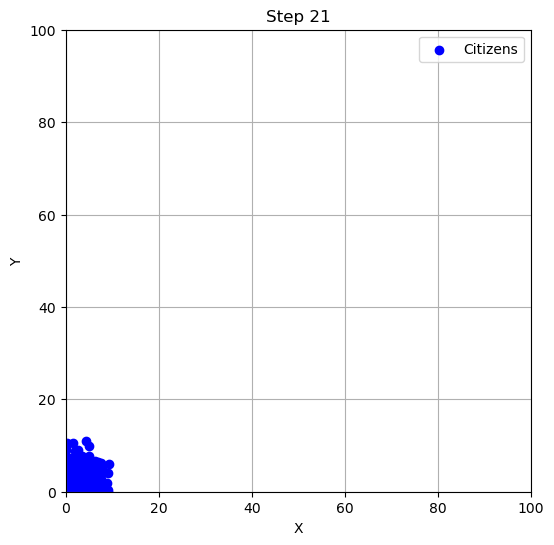

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import torch

def animate_positions(runner):
    print("\n--- CREATING ANIMATION ---")

    # Extract bounds
    grid_width = runner.state_trajectory[0][0]['environment']['bounds'][0].item()
    grid_height = runner.state_trajectory[0][0]['environment']['bounds'][1].item()

    # Prepare figure
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    scatter = ax.scatter([], [], c='blue', label='Citizens')
    ax.legend()

    # Preprocess positions for all steps
    all_positions = []
    for step_list in runner.state_trajectory:
        state = step_list[0]
        positions = state['agents']['citizens']['position'].detach().cpu().numpy()
        all_positions.append(positions)

    # Update function
    def update(frame):
        positions = all_positions[frame]
        scatter.set_offsets(positions)
        ax.set_title(f"Step {frame + 1}")
        return scatter,

    # Create animation
    anim = FuncAnimation(fig, update, frames=len(all_positions), interval=300, blit=True)

    # Display in Jupyter
    return HTML(anim.to_jshtml())

# Call in notebook
animate_positions(runner)